In [269]:
import tensorflow as tf
tf.__version__
import numpy as np

In [270]:
"""
Problem statement : Predict house price.
Input: #bedrooms, #garages , #builtuparea, #kitchens
Output: Price of the house
"""
##set random seed
tf.random.set_seed(42)

# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
#     path='boston_housing.npz', test_split=0.2, seed=113
# )


In [271]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [272]:
X = np.arange(-7.0, 17, 3.0) #input/features
y = np.arange(3.0, 27.0, 3.0) # labels/ground_truth
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [273]:

#create input
# house_info = tf.constant(["bedrooms", "garages" , "uiltuparea", "kitchens"])
# house_price = tf.constant([350000])

X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)


#s1. create a model
regression_model = tf.keras.Sequential([
  # tf.keras.Input(shape=(4,)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                                        
])

#s2. compile the model
regression_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["mae"]
)

#s3. fit(predict) the model
regression_model.fit(X, y, epochs=500)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
1/1 [==============================] - 0s 357ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 12.9322 - mae: 12.9322
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 12.5772 - mae: 12.5772
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 12.2333 - mae: 12.2333
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 11.9221 - mae: 11.9221
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 11.6151 - mae: 11.6151
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 11.2956 - mae: 11.2956
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 10.9702 - mae: 10.9702
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 10.6821 - mae: 10.6821
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 10.4218 - mae: 10.4218
Epoch 11/500
1/1 [==============================] - 0s 7m

In [274]:
#Eval model
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [275]:
y_pred = regression_model.predict([17.0])

In [276]:
y_pred

array([[26.75786]], dtype=float32)

###Evaluating model
A typical workflow you'll go through when building neural networks is:
        
```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```
        
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.
        
###Visualize visualize visualize
        
When it comes to evaluation you'll want to remember the words: 
visualize visualize visualize.
        
This is because you're probably better looking at something (doing) than you are thinking about something.
        
It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?
        
Let's start by visualizing the model.
        
But first we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before but the more practice the better).



In [277]:
#create a larger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [278]:
#Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

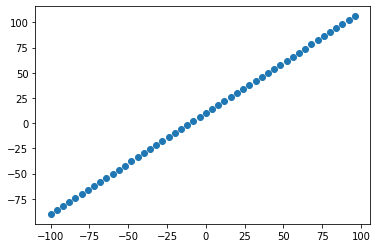

In [279]:
#Visualize
import matplotlib.pyplot as plt
plt.scatter(X, y)

###The 3 sets...
* **Train set** - model learns from this data , typically 70-80% of total data.
* **Validation set** - model gets tuned on this data, typically 10-15% of total data
* **Test set** - model gets evaluated(tested) on this data, typically 10-15% of total data

In [280]:
#check the size of dataset
len(X) , len(y)

(50, 50)

In [281]:
#Split data into train and test
X_train = X[:40] # first 40 samples from dataset(80%)
y_train = y[:40]

X_test = X[40:] # last 10 samples from dataset(20%)
y_test = y[40:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

###Visualizing  the data

Now we have got our data in training and test sets.. let's visualize it again!

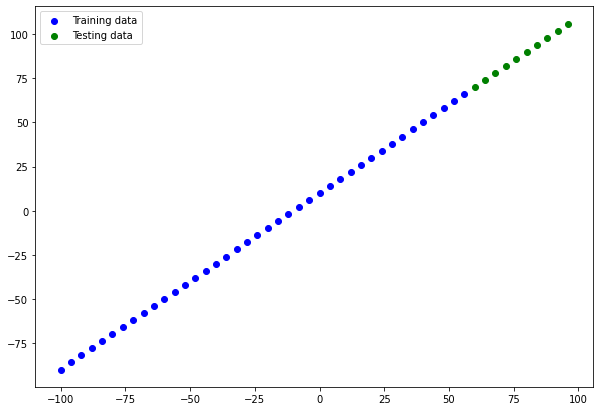

In [282]:
plt.figure(figsize=(10, 7))
#plot training data
plt.scatter(X_train , y_train, c="blue", label="Training data")
#plot testing data
plt.scatter(X_test , y_test, c="green", label="Testing data")
#show a legend
plt.legend()

In [283]:
#build NN

reg_model1 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1)
])

reg_model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# reg_model1.fit(X_train, y_train, epochs=100)


In [284]:
#build model automatically by defining input_shape
tf.random.set_seed(42)

reg_model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

reg_model1.compile(
    loss=tf.keras.losses.mae,
    # optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
reg_model1.summary( )

# reg_model1.fit(X_train, y_test, epochs=500)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - patterns(params) the model that can update
* Non-trainable params - params aren't updated during training(typically when **transfer learning** is used)

In [285]:
#fitting the model
reg_model1.fit(X_train, y_train, epochs=100, verbose=0)

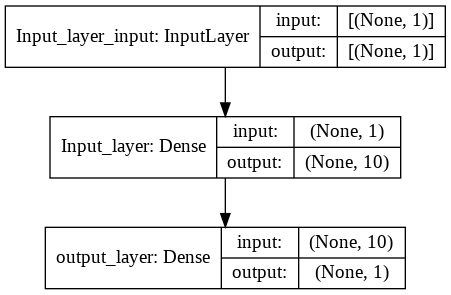

In [286]:
from tensorflow.keras.utils import plot_model

plot_model(reg_model1, show_shapes=True)

###Visualizing model preds

To visualize preds,  plot them against ground truth.
Often , in the formt_test or y_true vs y_pred(ground truth )

In [287]:
#Make some preds
y_pred = reg_model1.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [288]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [289]:
#plot fn
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               preds=y_pred):
  """
  Plots training data, test data and compare preds to ground truth
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, preds, c="r", label="Predictions")
  plt.legend()

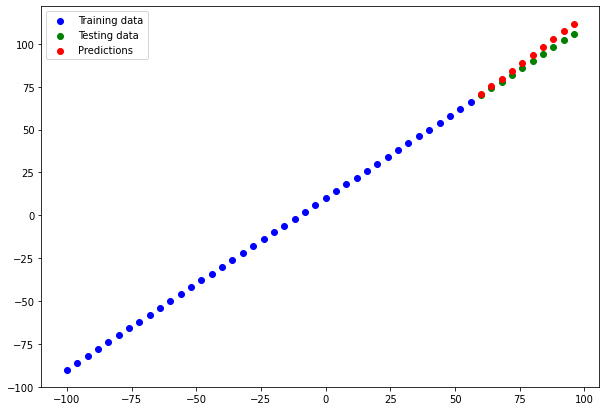

In [290]:
plot_preds(train_data=X_train,
           train_labels=y_train,
           test_data=X_test,
           test_labels=y_test,
           preds=y_pred)

###Evaluate model with regression evaluation metrics

For regression problems , two of the main metrics are:
* **MAE** - mean absolute error - brute force(naive way)
* **MSE** - mean squared error - when larger erros are more significant than smaller ones

In [291]:
#Evaluate model on test
reg_model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 89ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [292]:
#get mae
mae = tf.keras.metrics.mae(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [293]:
tf.squeeze(tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [294]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [295]:
mae = tf.metrics.mae(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [296]:
#get mse In general, mse > mae .
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [297]:
#loss functions

def mae(y_test, y_pred):
  return tf.metrics.mae(y_test, tf.squeeze(y_pred))

def mse(y_test, y_pred):
  return tf.metrics.mse(y_test, tf.squeeze(y_pred))


###Improve the model

```
Build a model -> fit it -> evaluate it -> tweak it -> ... -> fit it -> evaluate it
```

1. Get more data - more data(augmentation) to learn relationships/patterns between feature and labels.
2. Make model complex(deep , increase hidden units.
3. Train for longer

Three modelling experiments:

1. `model_1` - same as original model , 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 1000 epochs.

***Build model_1***

In [298]:
#set random seed
tf.random.set_seed(42)

#1 create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                               
])

#2 compile model
model_1.compile(
    loss=tf.keras.losses.mae,
    # optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#3 fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

In [299]:
X_train , y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

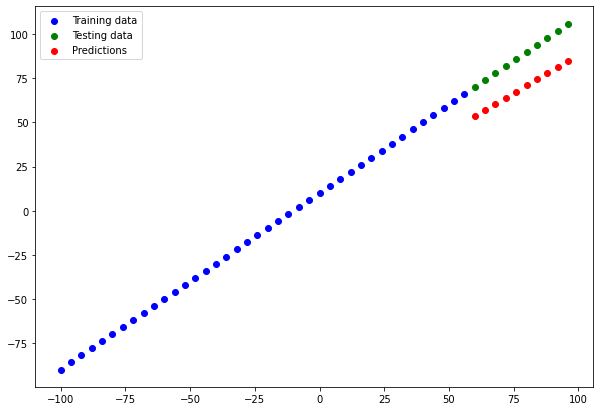

In [300]:
#Make and plit preds for model_1

y_preds_1 = model_1.predict(X_test)
plot_preds(X_train, y_train, X_test, y_test
    ,y_preds_1)

In [301]:
#calculate model_1 evaulation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

***Build model_2***


In [302]:
#set seed
tf.random.set_seed(42)

#create the  model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

#fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

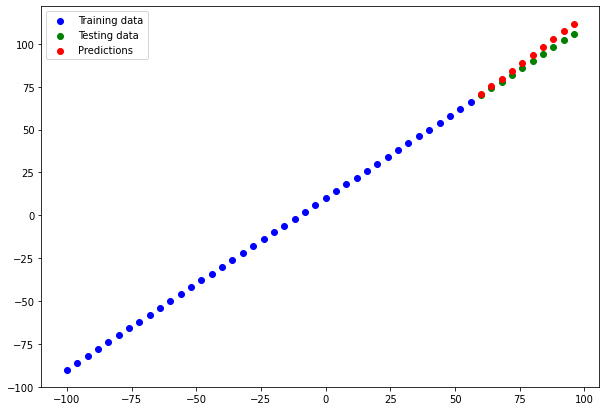

In [303]:
#Make and plot preds
y_preds_2 = model_2.predict(X_test)
plot_preds(X_train,
           y_train,
           X_test,
           y_test,
           y_preds_2)

In [304]:
#get model_2 metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

***Build model_3***

In [305]:
#set random seed
tf.random.set_seed(42)

#create model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                              
])

#compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 5ms/

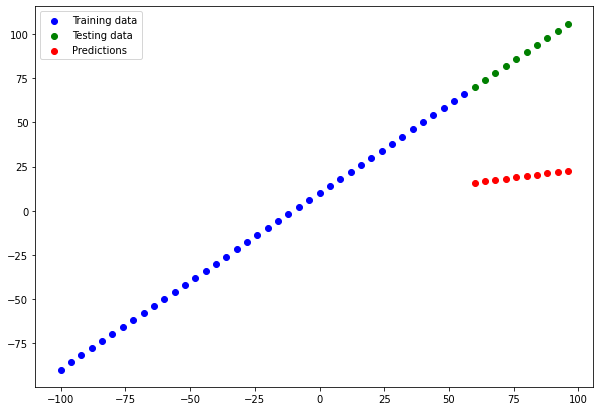

In [306]:
#Make plot preds
y_preds_3 = model_3.predict(X_test)
plot_preds(X_train,
           y_train,
           X_test,
           y_test,
           y_preds_3)

***NOTE: Overfitting***

In [307]:
#get metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

###Analysing model_1, model_2, model_3

In [308]:
#Let's compare model_1 2 and 3
import pandas as pd

model_results = [
                 ["model_1 ", mae_1.numpy(), mse_1.numpy()],
                 ["model_2 ", mae_2.numpy(), mse_2.numpy()],
                 ["model_3 ", mae_3.numpy(), mse_3.numpy()]
                 ]
all_results = pd.DataFrame(model_results, columns=["model ", "mae ", "mse "])                 
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [309]:
model_2.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________



From our experiments it looks like `model_2` performed the best.

And now you might be thinking wow comparing models is tedious... and it definitely can be we've only compared 3 models here. 

But this is part of what machine learning modelling is about trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment. 

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do the more things you'll figure out which don't work and in turn get closer to figuring out what does work. Remember the machine learning practitioner's motto: experiment experiment experiment.

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models you'll want to look into using tools such as:
* **TensorBoard**(https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **Weights & Biases**(https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving a model

Once you've trained a model and found one which performs to your liking you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using `model.save()`(https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The SavedModel format(https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The HDF5 format(https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [310]:
#save model_2 using the SavedModel format
model_2.save("model_2_SavedModel_Format")

INFO:tensorflow:Assets written to: model_2_SavedModel_Format/assets


In [311]:
#save model_2 using the HDF5 format
model_2.save("model_2_HDF5_Format.h5")

In [312]:
!ls

model_2_HDF5_Format.5	model_2_SavedModel_Format  sample_data
model_2_HDF5_Format.h5	model.png


In [313]:
#load model_2 from SavedModel format(protobuf file is a pb file)
loaded_model_2 = tf.keras.models.load_model("/content/model_2_SavedModel_Format")

In [314]:
loaded_model_2.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [315]:
type(loaded_model_2) , type(model_2)

(tensorflow.python.keras.engine.sequential.Sequential,
 tensorflow.python.keras.engine.sequential.Sequential)

In [316]:
#compare model_2 preds and loaded_model_2
model_2_preds = model_2.predict(X_test)
loaded_model_2_preds = loaded_model_2.predict(X_test)
model_2 == loaded_model_2_preds

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [317]:
model_2_preds, loaded_model_2_preds

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [318]:
mae(y_test, model_2_preds) == mae(y_test, loaded_model_2_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [319]:
model_2_preds.squeeze() == loaded_model_2_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [320]:
#Load in file using h5 file format(keras default)
keras_load_model_2 = tf.keras.models.load_model("/content/model_2_HDF5_Format.h5")
keras_load_model_2.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [321]:
#check to see if loaded .h5 preds match model_2
model_2_preds = model_2.predict(X_test)
keras_loaded_model_2_preds = keras_load_model_2.predict(X_test)
model_2_preds == keras_load_model_2

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [324]:
model_2_preds.shape, keras_loaded_model_2_preds.shape

((10, 1), (10, 1))